Linear Regression


In this problem, will implement least squares linear regression to predict density of wine based on its
acidity. 

The files linearX.csv and linearY.csv contain the acidity of the wine (x (i) ’s, x (i) ∈ R) and its density (y (i) ’s, y (i) ∈ R), respectively, with one training example per row. Here, least squares linear regression is implemented to learn the relationship between x (i) ’s and y (i) ’s.

(a) Implement batch gradient descent method for optimizing J(θ). Choose an appropriate learning rate and the stopping criteria (as a function of the change in the value of J(θ)). Report your learning rate, stopping criteria and the final set of parameters obtained by your
algorithm.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [3]:
dataX_df = pd.read_csv('./data/q1/linearX.csv', header=None, names=['X'])
dataY_df = pd.read_csv('./data/q1/linearY.csv', header=None, names=['y'])

In [4]:
dataX_df.shape

(100, 1)

In [5]:
q1_m = dataX_df.shape[0]
q1_m

100

Converting the data to an array with one being added as X0 to X

In [6]:
q1_X = dataX_df['X'].to_numpy().reshape(q1_m, 1)
ones = np.ones((q1_m, 1))
q1_X = np.concatenate((ones, q1_X), axis=1)
q1_y = dataY_df['y'].to_numpy().reshape(q1_m, 1)
q1_X.shape, q1_y.shape

((100, 2), (100, 1))

First 5 elements of X and y

In [7]:
q1_X[:5], q1_y[:5]

(array([[1. , 9.1],
        [1. , 8. ],
        [1. , 9.1],
        [1. , 8.4],
        [1. , 6.9]]),
 array([[0.99523],
        [0.99007],
        [0.99769],
        [0.99386],
        [0.99508]]))

Text(0.5, 1.0, 'Traning Dataset')

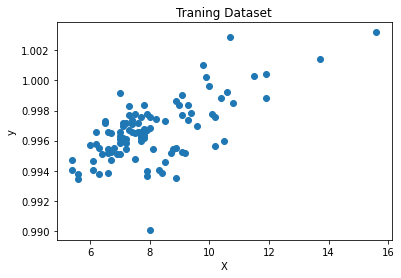

In [8]:
plt.scatter(dataX_df, dataY_df)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Traning Dataset')

Function to predict y based on x and theta value

In [9]:
def predicted_y(data, theta=np.array([[0], [0]])):
    return data@theta

Early prediction taking theta as [0, 0]

In [10]:
predicted_y(q1_X)[:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

Cost function 

In [11]:
def cost_function(X, Y, theta= np.array([[0], [0]])):
    m = len(Y)
    predictedY = predicted_y(X, theta)
    diff = (Y - predictedY)
    sum_ = diff.T@diff
    return sum_[0][0]/(2*m)

Initial Cost

In [12]:
cost_function(q1_X, q1_y)

0.4966279047145001

Update theta based on the predicted y and real y

In [13]:
def updateParameter(X, Y, learning_rate, theta = np.array([[0],[0]])):
    m = X.shape[0]
    n = X.shape[1]
    predY = predicted_y(X, theta)
    sum = (Y - predY).T@X
    sum = sum.reshape(n, 1)
    updation = (learning_rate*sum)/m
    theta = theta + updation
    return theta

In [14]:
updateParameter(q1_X, q1_y, 0.05)

array([[0.04983101],
       [0.40185303]])

Batch Gradient Descent

Input:
X - Training Input data 
y - Training Output data
learningRate - Learning Rate
epoch - Number of times parameter will be update

Output:
theta - Updated Theta parameter

In [15]:
def batchGradientDescent(X, Y, learningRate, epoch, convergence):
    theta = np.array([[0.0], [0.0]])
    thetaList = []
    cost_list = []
    for turn in range(epoch):
        theta = updateParameter(X, Y, learningRate, theta)
        thetaList.append(theta)
        cost_ = cost_function(X, Y, theta)
        perUpdate = 1
        if turn != 0:
           costDiff = abs(cost_ - cost_list[-1])
           perUpdate = costDiff/cost_list[-1]
        if perUpdate < convergence:
            return thetaList[:-1], cost_list
        cost_list.append(cost_)
    return thetaList, cost_list

Batch Gradient Descent for learning rate 0.1

In [16]:
thetaPara1, costList1 = batchGradientDescent(q1_X, q1_y, 0.1, 100, 0)

In [17]:
q1_y_1 = predicted_y(q1_X, thetaPara1[-1])

In [18]:
cost_function(q1_X, q1_y, thetaPara1[-1])

5.405059534761875e+153

Batch Gradient Descent for learning rate 0.025

In [19]:
thetaPara2, costList2 = batchGradientDescent(q1_X, q1_y, 0.025, 10000, 0.001)

In [20]:
q1_y_2 = predicted_y(q1_X, thetaPara2[-1])

In [21]:
thetaPara2[-1]

array([[0.98346529],
       [0.00159492]])

In [22]:
cost_function(q1_X, q1_y, thetaPara2[-1])

2.2300654835395997e-06

Batch Gradient Descent for learning rate 0.001

In [23]:
thetaPara3, costList3 = batchGradientDescent(q1_X, q1_y, 0.001, 100000, 0.000075)

In [24]:
q1_y_3 = predicted_y(q1_X, thetaPara3[-1])

In [25]:
thetaPara3[-1]

array([[0.9711762 ],
       [0.00305357]])

In [26]:
cost_function(q1_X, q1_y, thetaPara3[-1])

9.224961797159204e-06

Graph based Analysis with respect to different learning rate

In [27]:
def comparePredictedY(X, Y, Y_pred):
    X_i = [ele[1] for ele in X]
    plt.scatter(X_i, Y, label='real')
    plt.plot(X_i, Y_pred, label='predicted')
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    plt.title('Comparison')
    plt.legend()
    plt.show()


Comparing predicted y with real y for learning rate 0.1

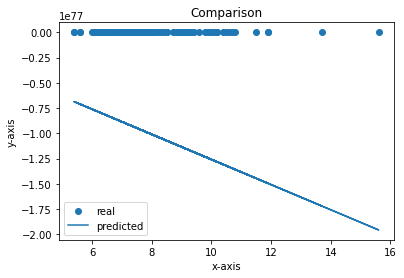

In [28]:
comparePredictedY(q1_X, q1_y, q1_y_1)

Comparing predicted y with real y for learning rate 0.025

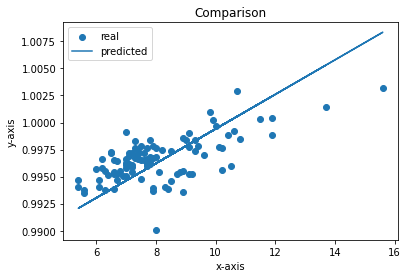

In [29]:
comparePredictedY(q1_X, q1_y, q1_y_2)

Comparing predicted y with real y for learning rate 0.001

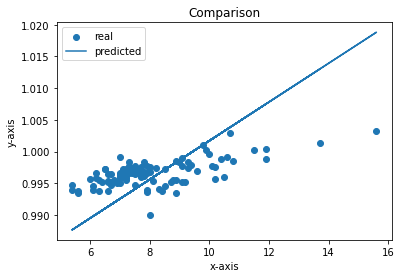

In [30]:
comparePredictedY(q1_X, q1_y, q1_y_3)

Cost Function vs Epoch for different learning parameter

In [31]:
def costGraphh(alist):
    len_ = len(alist)
    xVal = [ele for ele in range(1, len_ + 1)]    
    plt.plot(xVal, alist)
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    plt.title('Cost graph')
    plt.show()

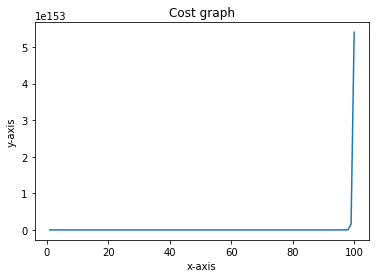

In [32]:
costGraphh(costList1)

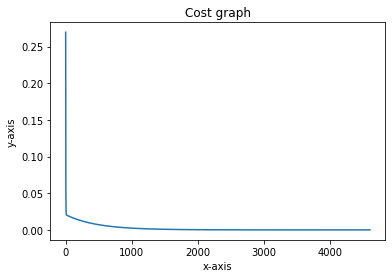

In [33]:
costGraphh(costList2)

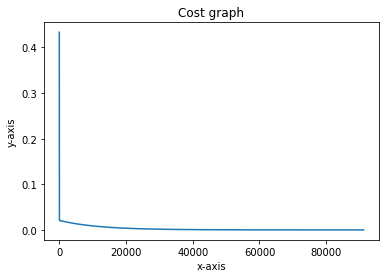

In [34]:
costGraphh(costList3)

In [35]:
def costFunc(theta1, theta2):
    costArray = list()
    len_ = len(theta1)
    for rowIndex in range(len_):
        intLen = len(theta1[rowIndex])
        rowCost = []
        for colIndex in range(intLen):
            thetapara = np.array([theta1[rowIndex][colIndex], theta2[rowIndex][colIndex]])
            cost = cost_function(q1_X, q1_y, thetapara)
            rowCost.append(cost)
        costArray.append(rowCost)
    return costArray

In [36]:
def plot3D(start, end, division, aFunc, thetaPara, costList):
    the1 = [ele[0] for ele in thetaPara]
    the2 = [ele[1] for ele in thetaPara]
    theta1 = np.linspace(start, end, division)
    theta2 = np.linspace(start, end, division)
    THETA1, THETA2 = np.meshgrid(theta1, theta2)
    Z = np.array(aFunc(THETA1, THETA2))
    fig = plt.figure()
    ax = plt.axes(projection = '3d')
    ax.plot3D(the1[0], the2[0], costList[0], color = 'red')
    ax.plot_wireframe(THETA1, THETA2, Z, color ='green')
    ax.set_title('Cost Function per theta parameter')

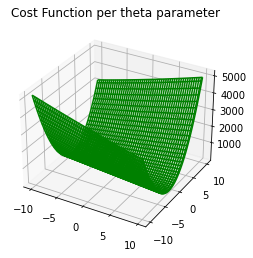

In [37]:
plot3D(-10, 10, 100, costFunc, thetaPara1, costList1)

-------------------------------------------------------------------------------------------------------------------

SAMPLING AND STOCHASTIC GRADIENT DESCENT

In this problem, Introducing the idea of $sampling$ by adding Gaussian noise to the prediction of a
hypothesis and generate synthetic training data. Consider a given hypothesis hθ (i.e. known θ0 , θ1 , θ2 )
Adding Gaussian noise, equation becomes

y = θ0 + θ1 x1 + θ2 x2 + e
where e ∼ N (0, σ^2 )

To gain deeper understanding behind $Stochastic$ $Gradient$ $Descent$ (SGD), will use the SGD algorithm
to learn the original hypothesis from the data generated using sampling, for varying batch sizes. Will
also implement the version where we make a complete pass through the data in a round robin fashion (after
initially shuffling the examples). If there are r examples in each batch, then there is a total of m
r batches assuming m training examples.

a) Sample 1 million data points taking values of θ = [θ1 θ2 θ3].T = [3 2 1].T, x1 ∼ N (3, 4) and x2 ∼ N (−1, 4) independently, and noise variance in y, σ^2 = 2.

In [38]:
mu1, sigma1= 3, 4
mu2, sigma2= -1, 4
randX0 = np.ones((1000000))
randX1 = np.random.normal(mu1, sigma1, 1000000)
randX2 = np.random.normal(mu2, sigma2, 1000000)

In [39]:
randDataDF = pd.DataFrame({'X0': randX0, 'X1': randX1, 'X2': randX2})
randDataDF

,X0,X1,X2
0,1.0,1.745123,-2.041829
1,1.0,2.783413,0.190319
2,1.0,0.354295,-0.678172
3,1.0,6.523690,0.011608
4,1.0,0.427024,-3.968208
...,...,...,...
999995,1.0,2.187004,-1.751655
999996,1.0,2.397448,-5.107878
999997,1.0,1.584209,-3.668748
999998,1.0,3.410107,2.012617


In [40]:
randArr = randDataDF.to_numpy().reshape(1000000, 3)
randArr, randArr.shape

(array([[ 1.        ,  1.74512348, -2.04182934],
        [ 1.        ,  2.78341292,  0.19031886],
        [ 1.        ,  0.35429476, -0.67817238],
        ...,
        [ 1.        ,  1.58420895, -3.66874822],
        [ 1.        ,  3.41010682,  2.01261749],
        [ 1.        ,  0.06379099, -2.11776963]]),
 (1000000, 3))

In [41]:
randTheta = np.array([[3],[1],[2]])
randTheta

array([[3],
       [1],
       [2]])

In [42]:
randY = randArr@randTheta
randY, randY.shape

(array([[ 0.6614648 ],
        [ 6.16405065],
        [ 1.99795001],
        ...,
        [-2.7532875 ],
        [10.4353418 ],
        [-1.17174828]]),
 (1000000, 1))

b) Implementing $Stochastic$ $gradient$ $descent$ method for optimizing J(θ). Relearning θ = [θ0, θ1, θ2] using sampled data points of keeping everything same except the batch size. Keep η = 0.001 and initialize ∀j θ j = 0. 

Different theta values are reported

In [57]:
def stochasticGradientDescent(X, Y, learningRate, batch_size, convergence, k):
    theta = np.array([[0.0], [0.0], [0.0]])
    thetaList = []
    cost_list = []
    m = Y.shape[0]
    numBatch = m//batch_size
    costDiff = 1
    iter = 0
    print("Log :")
    while(True):
        for batch_no in range(numBatch):
            start = batch_no*batch_size
            end = (batch_no + 1)*batch_size
            theta = updateParameter(X[start: end], Y[start: end], learningRate, theta)
            thetaList.append(theta)
            cost_ = cost_function(X, Y, theta)
            cost_list.append(cost_)
            if (iter%k==0 and iter>k):
                lastkAvg = np.sum(cost_list[-k:])/k
                beforekAvg = np.sum(cost_list[-2*k : -k])/k
                costDiff = beforekAvg - lastkAvg
                print(costDiff)
            iter = iter + 1
            if costDiff < convergence:
                return thetaList[:-k], cost_list[:-k]

SGD for batch size = 1

In [58]:
sgdtheta1, sgdcost1 = stochasticGradientDescent(randArr, randY, 0.001, 1, 0.0001, 100)

Log :
10.88459010026226
0.7256653096421377
0.2157621552764597
0.18089961156297685
0.22284911624818227
0.16477052344761822
0.1363043782375637
0.09782008978918044
0.10786502061790526
0.08592457945663023
0.08788935707723622
0.08474865038294932
0.06696762554483082
0.05844172810023446
0.04856752823624488
0.042489867854358876
0.05619994789182353
0.03539999905504981
0.027912743076869972
0.03129605344403552
0.02619226157619592
0.021884188381833924
0.01597876492644995
0.019691541871085794
0.01864334679376972
0.011869978296468686
0.009569949036284053
0.008264665964275775
0.012833088111979293
0.009299268924747653
0.00823480819612641
0.00793382316254531
0.005266235292077731
0.0049447478504948406
0.004289355910854234
0.004964808603322407
0.003910665589773751
0.0027923363534497307
0.0029052932269218457
0.0028722536893332658
0.0019806484508348154
0.0019787912614342203
0.0016977305854172838
0.0015917501568341874
0.0010918673830972812
0.0010807831931918376
0.00112365566220104
0.0011027422578895078
0.00

In [59]:
sgdcost1[-1], sgdtheta1[-1]

(0.0008811601184251451,
 array([[2.94655604],
        [1.00653956],
        [1.99820168]]))

For batch size = 1, It takes 3 minutes 8.6 seconds to get the theta value [2.9465, 1.0065, 1.9982] compared to original [3, 1, 2] 

In [60]:
sgdPredY1 = predicted_y(randArr, sgdtheta1[-1])

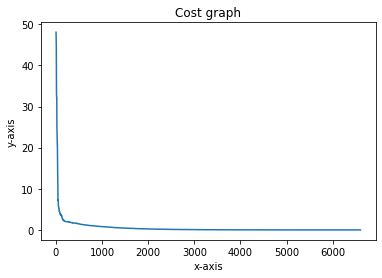

In [78]:
costGraphh(sgdcost1)

SGD for batch size = 100

In [61]:
sgdtheta100, sgdcost100 = stochasticGradientDescent(randArr, randY, 0.001, 100, 0.0001, 100)

Log :
11.781654972262803
0.6892291048885999
0.23941920495457225
0.19502743094844233
0.1721294960765687
0.15398562653676184
0.13607778267969106
0.12277232399368143
0.1075852407641279
0.09451931834519178
0.08333669637182717
0.07366275604116579
0.06537850487417285
0.05796269003137389
0.050549648883469356
0.04500878292126964
0.03985333837723559
0.035477030980676894
0.031698370899511163
0.027914605392973718
0.02471712222760461
0.02192658713611248
0.019555638066474784
0.01710038363520644
0.015201217800910938
0.013413005778848297
0.011916863669702377
0.010499943364787157
0.009291160904866397
0.00826613307943086
0.007287616604634672
0.006378895440515724
0.0057382892271449215
0.0051722217146509195
0.004632823198354549
0.0041002704741619
0.003600524593387819
0.003157020347290436
0.0028016419381173135
0.002464139951580218
0.0021703440226177144
0.0019319816502894518
0.0017386994206689543
0.0015283725643298017
0.0013485130303797725
0.0011960414575510926
0.0010561983193149802
0.0009231660690045057
0

In [62]:
sgdcost100[-1], sgdtheta100[-1]

(0.0007792684338241239,
 array([[2.94969018],
        [1.00591774],
        [1.99795485]]))

For batch size = 100, It takes 2 minutes 10.4 seconds to get the theta value [2.9496, 1.0059, 1.9979] compared to original [3, 1, 2] 

In [63]:
sgdPredY100 = predicted_y(randArr, sgdtheta100[-1])

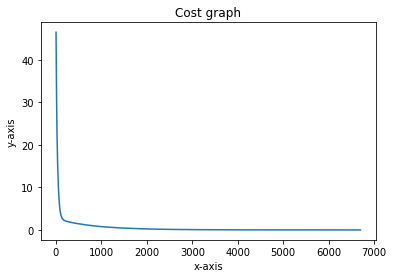

In [79]:
costGraphh(sgdcost100)

SGD for batch size = 10000

In [64]:
sgdtheta10000, sgdcost10000 = stochasticGradientDescent(randArr, randY, 0.01, 10000, 0.0001, 10)

Log :
6.942929583974671
0.4424141995601869
0.222355511529726
0.19310233751170003
0.16968512365266997
0.150208749053929
0.13434399589658086
0.1183492050035092
0.10496245876245991
0.0929109964410858
0.08239716382071705
0.07265729411360133
0.06418398657211288
0.05716602778568047
0.05027678487486803
0.044507306683741976
0.039805842252800816
0.03506667370795802
0.031100204465006
0.027529374518442146
0.024414143155234602
0.021528235909722526
0.019017608933978997
0.01693819936689142
0.014896928100876075
0.013187441267006994
0.011794405141658346
0.010390197349810448
0.009214939081534215
0.008156908081605255
0.007233870187460745
0.0063787806496323415
0.00563488603427794
0.0050187604230193875
0.004413935127212068
0.003907417009219781
0.003494662712124841
0.003078598268746263
0.0027303711900651187
0.0024168783568688235
0.0021433837573698877
0.0018900221433260402
0.0016696074006744034
0.0014870504023526722
0.0013078416687860774
0.0011577611892109683
0.001035462774496343
0.0009121835689194354
0.000

In [65]:
sgdcost10000[-1], sgdtheta10000[-1]

(0.000747458116773515,
 array([[2.9507224 ],
        [1.00578302],
        [1.9980835 ]]))

For batch size = 10000, It takes 13.4 seconds to get the theta value [2.9507, 1.0057, 1.9981] compared to original [3, 1, 2] 

In [66]:
sgdPredY10000 = predicted_y(randArr, sgdtheta10000[-1])

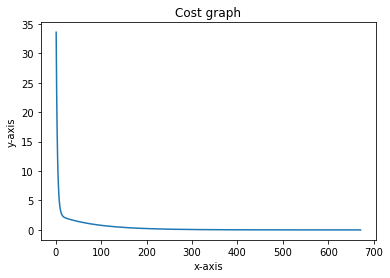

In [80]:
costGraphh(sgdcost10000)

SGD for batch size = 1000000

In [67]:
sgdtheta1000000, sgdcost1000000 = stochasticGradientDescent(randArr, randY, 0.01, 1000000, 0.0001, 1)

Log :
6.614830849531092
4.536289982279156
3.1335218722073925
2.1782830216485776
1.5229603624902
1.0706677917162883
0.756977233459307
0.5385588615849533
0.38599349928460924
0.2791488391521417
0.2041591715532829
0.15142539406181754
0.11427480329530537
0.08805389534581165
0.06950908793185429
0.05636106497925075
0.04701057514886475
0.04033418333642169
0.035541972949277856
0.032078134737142605
0.029551366910925747
0.027686065012929806
0.026288047039847884
0.02522046114119214
0.02438683765880345
0.02371915979720196
0.02316946294676181
0.022703916805732582
0.022298655384068722
0.021936838028485228
0.021606577728189746
0.02129948059035769
0.021009616086958616
0.020732790967182613
0.020466037258215053
0.020207251214193533
0.01995493870198639
0.019708035641500254
0.019465781373365854
0.019227629351242337
0.018993184156232967
0.01876215707461526
0.018534334767162042
0.01830955717137317
0.018087701915273646
0.017868673323572892
0.017652394662669435
0.017438802669911935
0.017227843693903733
0.01701

In [68]:
sgdcost1000000[-1], sgdtheta1000000[-1]

(0.008202254627433238,
 array([[2.83677281],
        [1.01923822],
        [1.99355924]]))

For batch size = 1000000, It takes 21.5 seconds to get the theta value [2.8368, 1.0192, 1.9935] compared to original [3, 1, 2] 

In [69]:
sgdPredY1000000 = predicted_y(randArr, sgdtheta1[-1])

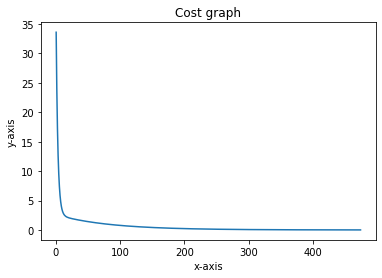

In [81]:
costGraphh(sgdcost1000000)

As per the result, batch size of 10000 compared to total training data 1000000 show better result




Using test data to check how the model performed for unknowned data

In [70]:
data_df = pd.read_csv('./data/q2/q2test.csv', header=0)

In [71]:
data_df

,X_1,X_2,Y
0,16.678,13.018,45.537
1,6.583,-5.539,-1.170
2,-19.837,6.089,-3.646
3,-8.412,6.110,8.137
4,1.052,11.595,25.781
...,...,...,...
9995,-1.476,16.595,31.906
9996,0.203,26.920,58.418
9997,6.381,2.484,13.018
9998,3.138,-5.425,-6.873


In [72]:
q2_n_rows = data_df.shape[0]
q2_n_rows

10000

In [73]:
q2_X = data_df[['X_1', 'X_2']].to_numpy().reshape(q2_n_rows, 2)
q2_y= data_df[['Y']].to_numpy().reshape(q2_n_rows, 1)

In [74]:
q2_X.shape

(10000, 2)

In [75]:
q2_y.shape

(10000, 1)

In [108]:
def testCost(X, y, theta):
    m = X.shape[0]
    ones = np.ones((m, 1))
    newX = np.concatenate((ones, X), axis=1)
    predy = newX@theta
    cost = np.sqrt((predy - y).T@(predy - y))
    return cost[0][0]/m

Cost of Test data for all the 4 theta value obtained above 

In [109]:
testCost1 = testCost(q2_X, q2_y, sgdtheta1[-1])
testCost1

0.01404552463363313

In [110]:
testCost100 = testCost(q2_X, q2_y, sgdtheta100[-1])
testCost100

0.01404267893091458

In [111]:
testCost10000 = testCost(q2_X, q2_y, sgdtheta10000[-1])
testCost10000

0.01404160645116466

In [112]:
testCost1000000 = testCost(q2_X, q2_y, sgdtheta1000000[-1])
testCost1000000

0.01423536920947121

Conclusion: SGD for batch size=10000 performed better compared to 1, 100, 1000000

------------------------------------------------------------------------------------------------------------------

LOGISTIC REGRESSION

The files logisticX.csv and logisticY.csv contain the inputs (x (i) ∈ R 2 ) and outputs
(y (i) ∈ {0, 1}) respectively for a binary classification problem, with one training example per row.

Implementing $Newton’s$ $method$ for optimizing L(θ), and applying it to fit a logistic regression model to
the data. Initialize Newton’s method with θ = ~ 0 (the vector of all zeros).

In [4]:
q3_X = pd.read_csv('./data/q3/logisticX.csv', header=None , names=['X1', 'X2'])
q3_y = pd.read_csv('./data/q3/logisticY.csv', header=None , names=['Y'])

In [5]:
q3_X.head()

,X1,X2
0,3.8915,4.2105
1,3.6898,6.6051
2,2.7763,7.5057
3,3.1137,5.7724
4,2.9251,5.4315


In [6]:
q3_labels = q3_y['Y'].unique()
q3_labels

array([0, 1])

In [7]:
n_rows = q3_X.shape[0]
ones = np.ones((n_rows, 1))
q3_x = np.concatenate([ones, q3_X], axis=1)
q3_y = np.array(q3_y)

In [8]:
def sigmoidFunc(X, theta = np.array([[0], [0], [0]])):
    thetaTX = X@theta
    expVal = np.exp(-thetaTX)
    return 1/(1 + expVal)    

In [9]:
def logisticUpdatePara(X, y, lr, theta = np.array([[0], [0], [0]])):
    m = X.shape[0]
    predY = sigmoidFunc(X, theta)
    grad = ((y - predY).T@X)/m
    newTheta = theta + lr*grad.T
    return newTheta

In [10]:
def logLikelihood(X, y, theta = np.array([[0], [0], [0]])):
    m = y.shape[0]
    sum = 0
    for ele in range(m):
        probY = sigmoidFunc(X[ele], theta)
        if y[ele][0] == 1:
            sum += np.log(probY)
        else:
            sum += np.log(1-probY)
    return sum[0]

In [11]:
logLikelihood(q3_x, q3_y)

-69.31471805599459

In [12]:
def logisticRegression(X, y, lr, convergence, theta = np.array([[0], [0], [0]])):
    lllist = []
    ll = logLikelihood(X, y, theta)
    lllist.append(ll)
    while(True):
        theta = logisticUpdatePara(X, y, lr, theta)
        ll = logLikelihood(X, y, theta)        
        lllist.append(ll)
        if(lllist[-1] - lllist[-2] < convergence):
            return theta, lllist


In [13]:
q3_theta, q3_ll = logisticRegression(q3_x, q3_y, 0.01, 0.0001)
q3_theta

array([[ 0.01180591],
       [ 1.75784934],
       [-1.72822473]])

In [14]:
logLikelihood(q3_x, q3_y, q3_theta)

-22.983746569541456

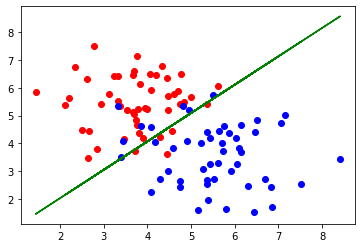

In [27]:
x1_0 = []
x1_1 = []
x2_0 = []
x2_1 = []
for ele in range(q3_y.shape[0]):
    if q3_y[ele] == 0:
        x1_0.append(q3_x[ele][1])
        x2_0.append(q3_x[ele][2])
    else:
        x1_1.append(q3_x[ele][1])
        x2_1.append(q3_x[ele][2])
x1 = np.array([ele[1] for ele in q3_x])
x2 = -(q3_theta[0][0] + q3_theta[1][0]*np.array(x1))/q3_theta[2][0]
plt.scatter(x1_0, x2_0, color='red')
plt.scatter(x1_1, x2_1, color='blue')
plt.plot(x1, x2, color='green')



In [28]:
def gradient(X, y, theta = np.array([[0], [0], [0]])):   
    x1 = [ele[1] for ele in X]
    x2 = [ele[2] for ele in X]                                                      
    sigmoid_probs = sigmoidFunc(X, theta)                                        
    return np.array([[np.sum((y - sigmoid_probs) * x1),
                     np.sum((y - sigmoid_probs) * x2),
                     np.sum((y - sigmoid_probs) * 1)]]) 

In [29]:
def hessian(X, y, theta = np.array([[0], [0], [0]])):   
    x1 = [ele[1] for ele in X]
    x2 = [ele[2] for ele in X]                                                                
    sigmoid_probs = sigmoidFunc(X, theta)                                        
    d1 = np.sum((sigmoid_probs * (1 - sigmoid_probs)) * x1 * x1)
    d2 = np.sum((sigmoid_probs * (1 - sigmoid_probs)) * x2 * x2)
    d3 = np.sum((sigmoid_probs * (1 - sigmoid_probs)) * x1 * x2)
    d4 = np.sum((sigmoid_probs * (1 - sigmoid_probs)) * x1 * 1)                  
    d5 = np.sum((sigmoid_probs * (1 - sigmoid_probs)) * x2 * 1)
    d6 = np.sum((sigmoid_probs * (1 - sigmoid_probs)) * 1 * 1)                  
    H = np.array([[d1, d3, d4],[d3, d2, d5], [d4, d5, d6]])                                           
    return H

In [30]:
gradient(q3_x, q3_y)

array([[0.00000000e+00, 9.09494702e-13, 0.00000000e+00]])

In [31]:
hessian(q3_x, q3_y)

array([[5.76802916e+04, 4.99567217e+04, 1.15467925e+04],
       [4.99567217e+04, 5.59514106e+04, 1.13071700e+04],
       [1.15467925e+04, 1.13071700e+04, 2.50000000e+01]])

In [32]:
def classificationUsingNewton(X, y, theta = np.array([[0], [0], [0]])):
    for _ in range(10):
        g = gradient(X, y, theta)                                                      
        hess = hessian(X, y, theta)                                                 
        H_inv = np.linalg.inv(hess) 
        update = H_inv @ g.T
        theta = theta - update
        ll = logLikelihood(X, y, theta)
    return theta

In [33]:
classificationUsingNewton(q3_x, q3_y)

array([[-1.07814812e-17],
       [ 1.16319893e-17],
       [-2.77147160e-10]])

-------------------------------------------------------------------------------------------------------------------

GAUSSIAN DISCRIMINANT ANALYSIS

Implementing GDA for separating out salmons from Alaska and Canada. Each salmon is represented by two attributes x1 and x2 depicting growth ring diameters in 
    
    1) fresh water, 
    
    2) marine water, respectively. 
    
File q4x.dat stores the two attribute values with one entry on each row. File q4y.dat contains the target values (y (i) ’s ∈ {Alaska, Canada}) on respective rows.

Implement GDA using the closed form equations. Assume that both the classes have the same co-variance matrix i.e. Σ 0 = Σ 1 = Σ. Report the values of the means, µ 0 and µ 1 , and the co-variance matrix Σ

In [3]:
q4_X = pd.read_csv('./data/q4/q4x.dat', header=None, sep='  ', names=['X1', 'X2'], engine='python')
q4_y = pd.read_csv('./data/q4/q4y.dat', header=None , names=['y'])
q4_X.head(5), q4_y.head(5) 

(    X1   X2
 0  108  368
 1  131  355
 2  105  469
 3   86  506
 4   99  402,
         y
 0  Alaska
 1  Alaska
 2  Alaska
 3  Alaska
 4  Alaska)

Pre-processing

In [4]:
q4_X = np.array(q4_X)
q4_labels = list(np.unique(q4_y))
q4_y['y'].replace(q4_labels, [0, 1], inplace=True)
q4_y = np.array(q4_y)

Parameters


In [5]:
m = q4_y.shape[0]
n = q4_X.shape[1]

m, n

(100, 2)

In [6]:
q4_x0 = []
q4_x1 = []
for ele in range(m):
    x = [int(x_i) for x_i in q4_X[ele]]
    if q4_y[ele][0] == 0:
        q4_x0.append(q4_X[ele])
    else:
        q4_x1.append(q4_X[ele])
q4_x0 = np.array(q4_x0)
q4_x1 = np.array(q4_x1)


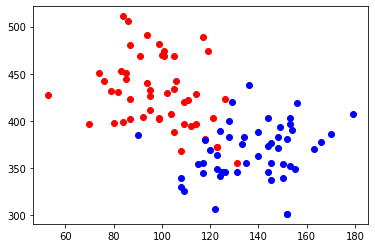

In [7]:
q4_x1_0 = []
q4_x1_1 = []
q4_x2_0 = []
q4_x2_1 = []
for ele in q4_x0:
    q4_x1_0.append(ele[0])
    q4_x2_0.append(ele[1])
for ele in q4_x1:
    q4_x1_1.append(ele[0])
    q4_x2_1.append(ele[1])
#x1 = np.array([ele[1] for ele in q3_x])
#x2 = -(q3_theta[0][0] + q3_theta[1][0]*np.array(x1))/q3_theta[2][0]
plt.scatter(q4_x1_0, q4_x2_0, color='red')
plt.scatter(q4_x1_1, q4_x2_1, color='blue')
#plt.plot(x1, x2, color='green')

Calculating phi, by describing bernoulli distribution in y

In [8]:
numYis1 = q4_x1.shape[0]
numYis0 = m - numYis1

phi = numYis1/m
phi

0.5

Determining the mean:

    miu - mean of whole dataset
    miu_0 - mean of dataset having label 0
    miu_1 - mean of dataset having label 1

In [9]:
miu = sum(q4_X)/m
miu_0 = sum(q4_x0)/numYis0
miu_1 = sum(q4_x1)/numYis1
miu = miu.reshape(2, 1)
miu_0 = miu_0.reshape(2, 1)
miu_1 = miu_1.reshape(2, 1)
miu, miu_0, miu_1

(array([[117.92],
        [398.14]]),
 array([[ 98.38],
        [429.66]]),
 array([[137.46],
        [366.62]]))

Detemining the variance:

    sigma - Variance of whole dataset
    sigma0 - Variance of dataset having label 0
    sigma1 - Variance of dataset having label 1


In [10]:
vpSum = np.array([[0.0 for _ in range(n)] for _ in range(n)])
for ele in q4_X:
    ele = ele.reshape(2, 1)
    diff = ele - miu
    vp = diff@diff.T
    vpSum += vp
sigma = vpSum/m


vpSum0 = np.array([[0.0 for _ in range(n)] for _ in range(n)])
for ele in q4_x0:
    ele = ele.reshape(2, 1)
    diff = ele - miu_0
    vp = diff@diff.T
    vpSum0 += vp
sigma0 = vpSum0/numYis0

vpSum1 = np.array([[0.0 for _ in range(n)] for _ in range(n)])
for ele in q4_x1:
    ele = ele.reshape(2, 1)
    diff = ele - miu_1
    vp = diff@diff.T
    vpSum1 += vp
sigma1 = vpSum1/numYis1

sigma, sigma0, sigma1

(array([[ 669.2936, -642.6488],
        [-642.6488, 2116.7604]]),
 array([[ 255.3956, -184.3308],
        [-184.3308, 1371.1044]]),
 array([[319.5684, 130.8348],
        [130.8348, 875.3956]]))

IF sigma1 = sigma2 = sigma(say)

In [11]:
sigma_inv = np.linalg.inv(sigma)
term0 = (miu_1 - miu_0).T@sigma_inv
term1 = (miu_1.T@sigma_inv@miu_1 - miu_0.T@sigma_inv@miu_0)/2
term2 = np.log((1-phi)/phi)
prob_yis1List = []
for index in range(m):
    logA = -term0@q4_X[index] + term1 + term2
    A = np.exp(logA)
    prob_yis1 = 1/(1 + A)
    prob_yis1List.append(prob_yis1)

Plotting the decision boundary

In [12]:
x1Val = np.array([ele for ele in range(50, 200)])
x2Val = []
for eleX in x1Val:
    val = (term1 + term2 - term0[0][0]*eleX)/term0[0][1]
    x2Val.append(val[0][0])
x2Val = np.array(x2Val)

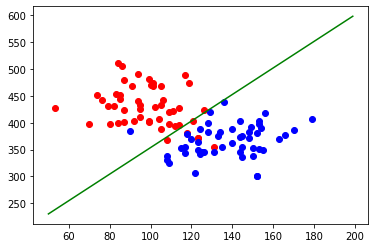

In [13]:
plt.scatter(q4_x1_0, q4_x2_0, color='red')
plt.scatter(q4_x1_1, q4_x2_1, color='blue')
plt.plot(x1Val, x2Val, color='green')

Prediction error on training Data

In [14]:
q4predY = []
for prob in prob_yis1List:
    if prob > 0.5:
        q4predY.append(1)
    else:
        q4predY.append(0)
q4predY = np.array(q4predY)
q4RealY =  q4_y.reshape(m,)
eachError = [np.abs(q4RealY[index] - q4predY[index]) for index in range(m)]
errorPer = np.sum(eachError)/m
errorPer

0.07

Taking each of the target classes having its own covariance matrix

In [33]:
a_mat = ((1-phi)/phi)*(np.sqrt(sigma1)@np.linalg.inv(np.sqrt(np.sqrt(sigma0**2))))
a_mat

array([[ 1.24352364, -0.14704452],
       [ 0.05361255,  0.77937947]])

In [35]:
np.linalg.det(sigma0), sigma1

(316196.1870719999,
 array([[319.5684, 130.8348],
        [130.8348, 875.3956]]))

In [36]:
sigma0_inv = np.linalg.inv(sigma0)
sigma1_inv = np.linalg.inv(sigma1)
term0 = sigma1_inv - sigma0_inv
term1 = 2*(miu_1.T@sigma1_inv - miu_0.T@sigma0_inv)
term2 = miu_1.T@sigma1_inv@miu_1 - miu_0.T@sigma0_inv@miu_0
term3 = np.log(((1-phi) /phi)*(np.sqrt(np.linalg.det(sigma1))/np.sqrt(np.linalg.det(sigma0))))

prob_yis1Listquad = []
for index in range(m):
    logA = 1/2*(q4_X[index].T@term0@q4_X[index] - term1@q4_X[index] + term2) + term3
    A = np.exp(logA)
    prob_yis1 = 1/(1 + A)
    prob_yis1Listquad.append(prob_yis1)

In [38]:
q4predYquad = []
for prob in prob_yis1Listquad:
    if prob > 0.5:
        q4predYquad.append(1)
    else:
        q4predYquad.append(0)
q4predYquad = np.array(q4predYquad)
q4RealY =  q4_y.reshape(m,)
eachError = [np.abs(q4RealY[index] - q4predYquad[index]) for index in range(m)]
quaderrorPer = np.sum(eachError)/m
quaderrorPer

0.07

In [62]:
def getPolycoeff(x1):
    A0 = term1[0][0]/2
    A1 = term1[0][1]/2
    a = term0[1][1]
    b = x1*(term0[0][0] + term0[0][1]) + A1
    c = (x1**2)*term0[0][0] + A0*x1 + term2[0][0]/2 + term3 
    return a, b, c

In [73]:
X1Valquad = []
X2Valquad = []
for index in range(50, 200):
    a, b, c = getPolycoeff(index)
    disPoly = b**2 - 4*a*c
    if disPoly > 0:
        X1Valquad.append(index)       
        X2Valquad.append((-b + np.sqrt(disPoly))/(2*a))
        X1Valquad.append(index)       
        X2Valquad.append((-b - np.sqrt(disPoly))/(2*a))
    elif disPoly == 0:
        X1Valquad.append(index)       
        X2Valquad.append((-b)/(2*a))

In [71]:
X1Valquad = np.array(X1Valquad)
X2Valquad = np.array(X2Valquad)

In [102]:
q4_x0_pred = []
q4_x1_pred = []
for ele in range(m):
    if prob_yis1Listquad[ele][0][0] > 0:
        q4_x0_pred.append(q4_X[ele])
    else:
        q4_x1_pred.append(q4_X[ele])
q4_x0_pred = np.array(q4_x0)
q4_x1_pred = np.array(q4_x1)

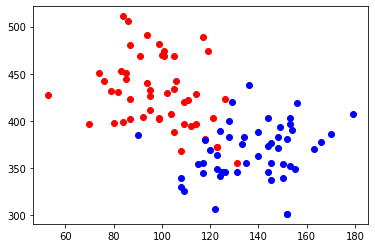

In [103]:
q4_x1_0_pred = []
q4_x1_1_pred = []
q4_x0_0_pred = []
q4_x0_1_pred = []
for ele in q4_x0_pred:
    q4_x0_0_pred.append(ele[0])
    q4_x1_0_pred.append(ele[1])
for ele in q4_x1_pred:
    q4_x0_1_pred.append(ele[0])
    q4_x1_1_pred.append(ele[1])
#x1 = np.array([ele[1] for ele in q3_x])
#x2 = -(q3_theta[0][0] + q3_theta[1][0]*np.array(x1))/q3_theta[2][0]
plt.scatter(q4_x0_0_pred, q4_x1_0_pred, color='red')
plt.scatter(q4_x0_1_pred, q4_x1_1_pred, color='blue')